## Graph style and font size settings                                                                                            

In [1]:
# importing the libraries we are going to use
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Setting the graoh style and font size
sns.set_style("darkgrid") # darkgrid, white grid, dark, white andticks
plt.rc("axes" , titlesize=17) # fontsize of the axis title
plt.rc("axes", labelsize=13)   #fontsize of x and y labels
plt.rc('xtick', labelsize=12)  #fontsize of the tick labels
plt.rc('ytick', labelsize=12)  #font of the tick labels
plt.rc("legend", fontsize=12)  #legend font size
plt.rc('font', size=12)        #control default text sizes
# first we use sns.set_style() to set the graph style which make seaborn and matplolib graphs look better by default
# plt.rc() customize the font size of the text diplayed in the plots.my choice is 17 for the title and 11 for the rest
       

In [3]:
# This are some of the color palettes Seaborn has
sns.color_palette("deep")
sns.color_palette("pastel")
sns.color_palette("Set2")
# This palettes have a list , so instead of using the classical 'b' to obtain the blue color you can extract 
# the color from these palettes by doing
sns.color_palette('deep')[0]


(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

In [4]:
# How to adjust figure size?
#plt.figure(figsize)
tight_layout = True # is used to clean up the padding in a plot  or between subplots
plt.figure(figsize=(8, 4), tight_layout = True)

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [5]:
# How to edit the figure appearance
# matplotlib plt.hist(,,,,, color=sns.color_palette('set')[2],lineswidth=2)
# seaborn  ax.sns.histplot(.., palette='Set2', linewidth=2) seaborn will have either the color or palette 
# parameters available

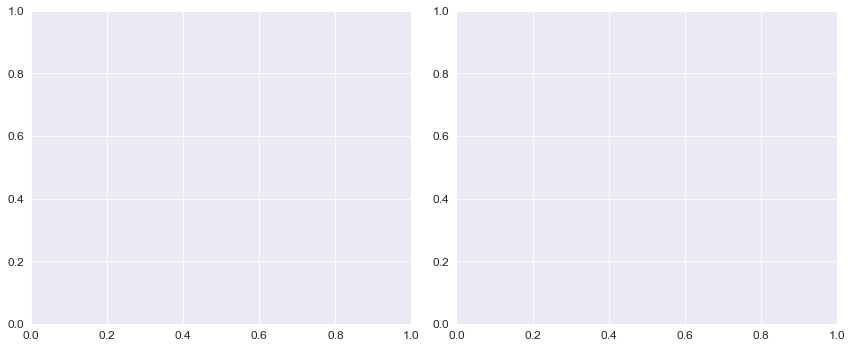

In [6]:
# we will use plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,5), tight_layout=True)

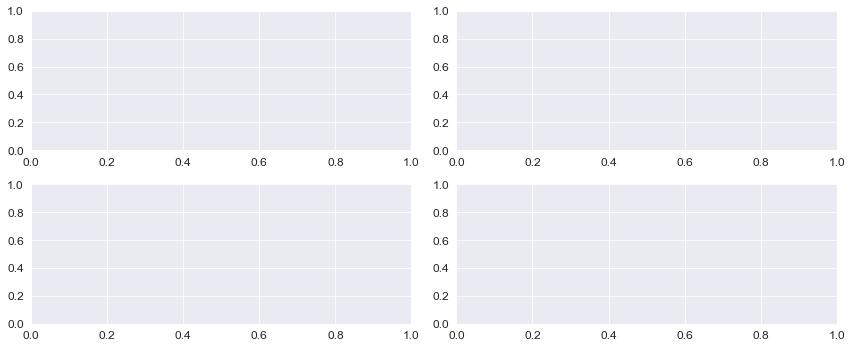

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,5), tight_layout=True)

Text(0.5, 1.0, 'Barplot')

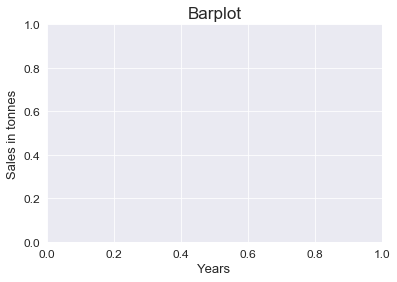

In [7]:
# Adding labels to axes and setting title names is similar between Matplotlib plt.xlabel() and Seaborn ax.set_xlabel()
# ax.set() in Seaborn because it takes care of most parameters in one line
 
#In matpltlib
plt.xlabel('Years')
plt.ylabel('Sales in tonnes')
plt.title('Barplot')



In [9]:
import seaborn as sns
# Seaborn
#ax.set(title='Barplot',xlabel='Years', ylabel='Sales in tonnes')

# Using a real data set
# FIFA21 players

In [8]:
# This fifa players data set will help us compare non-traditional football nations like the USA and Cananda with big 
# football nations such as England, Brazil and Argentina


fifa21 = pd.read_csv(r'C:\Users\Admin\Documents\Python\Kaggle Datasets\players_21.csv\players_21.csv')
country = ['United States', 'Canada', 'England','Brazil',  'Argentina']
fifa21_country = fifa21[fifa21['nationality'].isin(country)]
fifa21_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3964 entries, 0 to 18930
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 3.2+ MB


In [9]:
#preprocessing   creating a data frame
barplot = fifa21_country.groupby(['nationality'], as_index=False).mean()[['nationality','overall']]
barplot

,nationality,overall
0,Argentina,67.793803
1,Brazil,70.961669
2,Canada,62.346154
3,England,62.878338
4,United States,63.507937


Text(0.5, 1.0, 'Barplot')

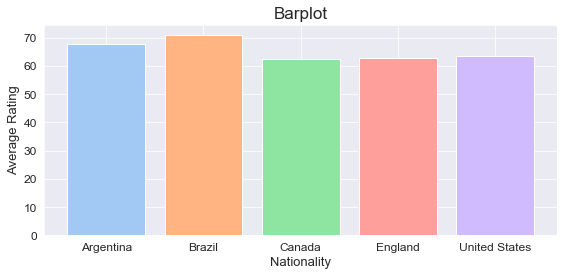

In [10]:
# Bar Plot in Matplotlib with plt.bar()
# plt.bar() needs two argument - name of categorical variable(nationality) and theirs length (overall ratings)
plt.figure(figsize=(8,4), tight_layout=True)
colors =sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
plt.xlabel('Nationality')
plt.ylabel('Average Rating')
plt.title('Barplot')

In [11]:
# Using Seaborn
# To get the 20 players of each country we need to do some preposessing
fifa_players20 = pd.concat([fifa21_country[fifa21_country['nationality']=='Argentina'][:20],
                      fifa21_country[fifa21_country['nationality']=='Brazil'][:20], 
                       fifa21_country[fifa21_country['nationality']=='England'][:20],
                        fifa21_country[fifa21_country['nationality']=='Canada'][:20],
                         fifa21_country[fifa21_country['nationality']=='United States'][:20]])
barplot2 = fifa_players20.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]
barplot2

,nationality,overall
0,Argentina,83.95
1,Brazil,85.30
2,Canada,71.15
3,England,83.60
4,United States,75.15


[Text(0, 0.5, 'Averahe Rating'),
 Text(0.5, 0, 'nationality'),
 Text(0.5, 1.0, 'Barplot')]

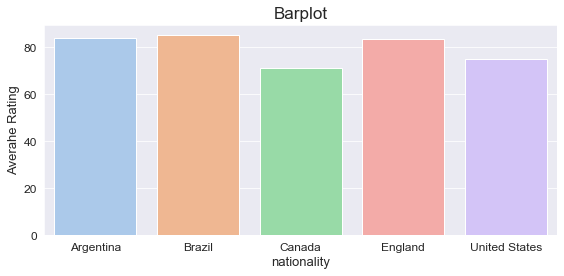

In [12]:
# Using sns.barplot()
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot2['nationality'], y =barplot2['overall'], palette = 'pastel', ci = None)
ax.set(title='Barplot', xlabel='nationality', ylabel='Averahe Rating')

In [13]:
#Preprocessing
barplot3 =fifa21_country[fifa21_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 
                                                             'German 1. Bundesliga'])]
barplot3 = barplot3.groupby(['nationality', 'league_name'], as_index = False).count()
barplot3

,nationality,league_name,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,Argentina,German 1. Bundesliga,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1,Argentina,Italian Serie A,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
2,Argentina,Spain Primera Division,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
3,Brazil,German 1. Bundesliga,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
4,Brazil,Italian Serie A,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
5,Brazil,Spain Primera Division,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
6,Canada,German 1. Bundesliga,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,Canada,Italian Serie A,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,England,German 1. Bundesliga,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9,England,Italian Serie A,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


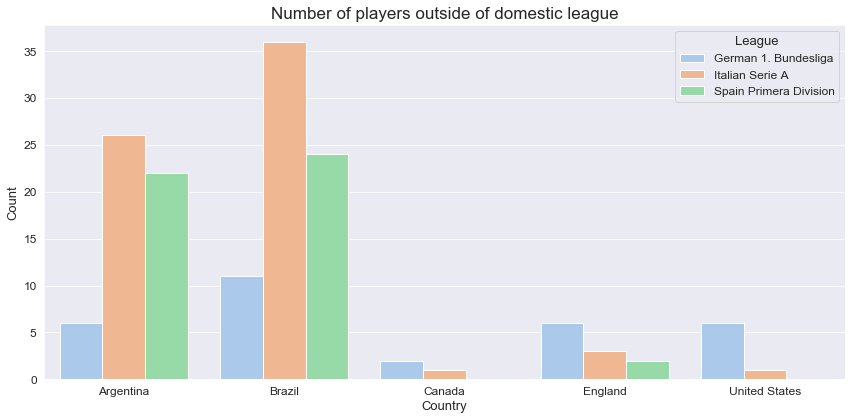

In [14]:
#we will hue = '' the component that distinguishes different colors mostly used when representing multiple categories
#in a plot
import seaborn as sns
plt.figure(figsize =(12,6), tight_layout = True)
ax=sns.barplot(x=barplot3['nationality'], y=barplot3['sofifa_id'], hue=barplot3['league_name'], palette = "pastel")
ax.set(title = 'Number of players outside of domestic league',xlabel = 'Country', ylabel = 'Count')
ax.legend(title = "League", title_fontsize='13', loc = 'upper right')

# Histogram

In [20]:
print(sns.version)

AttributeError: module 'seaborn' has no attribute 'version'

In [21]:
! pip install--upgrade seaborn

ERROR: unknown command "install--upgrade" - maybe you meant "install"



AttributeError: module 'seaborn' has no attribute 'displot'

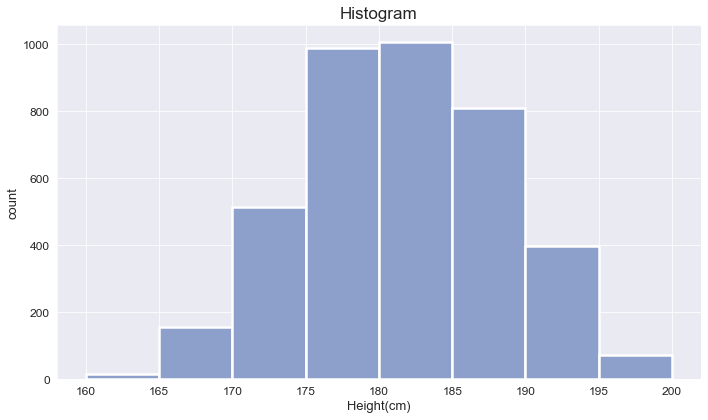

In [19]:
# Matplotlib's plt.hist() and seaborn's sns.distplot() work the same. Bothe need two arguments  the name of the
# numerical variable(height) and the number or list of bins.In this case, we made a list of bins called bins that 
# will be diplayed on the x-axis

plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]

#matplotlib
plt.hist(fifa21_country['height_cm'], bins=bins, color=sns.color_palette("Set2")[2], linewidth = 2.5)
plt.title('Histogram')
plt.xlabel('Height(cm)')
plt.ylabel("count")

# seaborn
ax =sns.displot(data=fifa21_country, x = 'height_cm', bins=bins, color=sns.color_palette('Set2')[2], linewidth =2)
ax.set(title='Histogram', xlabel='Height(cm', ylabel='Count')


# Boxplot

[Text(0.5, 1.0, 'Boxplot'), Text(0.5, 0, ''), Text(0, 0.5, 'Height(cm)')]

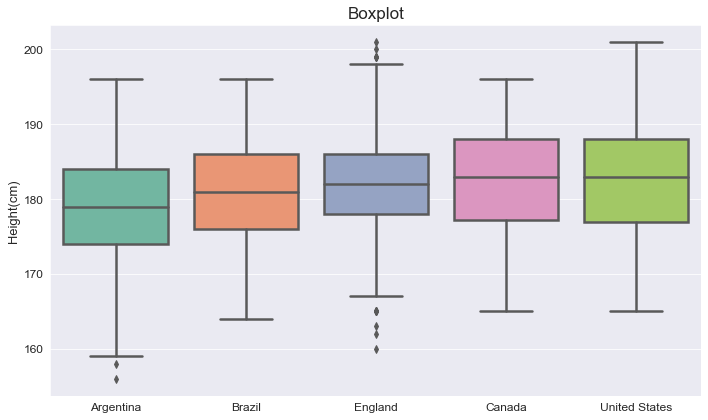

In [22]:
# We will use sns.boxplot(). When making boxplots with multiple categorical variable(nationality) and the name of the 
# numerical variable(heigt_cm)
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=fifa21_country, x ='nationality', y='height_cm', palette="Set2", linewidth=2.5)
ax.set(title ='Boxplot', xlabel ='', ylabel='Height(cm)')

# Scatterplot

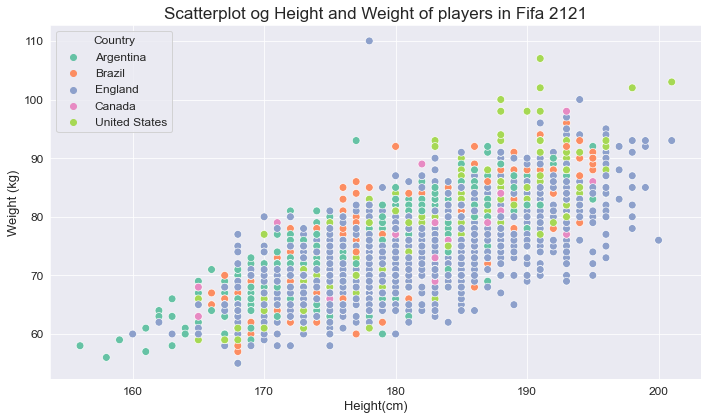

In [23]:
plt.figure(figsize=(10,6), tight_layout=True)
ax= sns.scatterplot(data=fifa21_country, x ='height_cm', y='weight_kg', hue='nationality',
                   palette = 'Set2', s=60)
ax.set(xlabel='Height(cm)', ylabel='Weight (kg)', title ='Scatterplot og Height and Weight of players in Fifa 2121')
ax.legend(title='Country', title_fontsize = 12)

# Piechart + Subplots

In [24]:
piechart=fifa21[fifa21['club_name']=='Chelsea']
piechart

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
27,215914,https://sofifa.com/player/215914/ngolo-kante/2...,N. Kanté,N'Golo Kanté,29,1991-03-29,168,70,France,Chelsea,...,85+3,86+2,86+2,86+2,85+3,84+3,83+3,83+3,83+3,84+3
62,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Havertz,21,1999-06-11,188,83,Germany,Chelsea,...,66+3,64+3,64+3,64+3,66+3,63+3,56+3,56+3,56+3,63+3
73,212188,https://sofifa.com/player/212188/timo-werner/2...,T. Werner,Timo Werner,24,1996-03-06,180,76,Germany,Chelsea,...,61+3,56+3,56+3,56+3,61+3,58+3,50+3,50+3,50+3,58+3
81,208670,https://sofifa.com/player/208670/hakim-ziyech/...,H. Ziyech,Hakim Ziyech,27,1993-03-19,181,65,Morocco,Chelsea,...,70+3,70+3,70+3,70+3,70+3,66+3,57+3,57+3,57+3,66+3
82,164240,https://sofifa.com/player/164240/thiago-emilia...,Thiago Silva,Thiago Emiliano da Silva,35,1984-09-22,183,79,Brazil,Chelsea,...,76+3,82+3,82+3,82+3,76+3,78+3,83+2,83+2,83+2,78+3
127,184432,https://sofifa.com/player/184432/cesar-azpilic...,Azpilicueta,César Azpilicueta Tanco,30,1989-08-28,178,77,Spain,Chelsea,...,80+3,82+2,82+2,82+2,80+3,81+3,81+3,81+3,81+3,81+3
157,207410,https://sofifa.com/player/207410/mateo-kovacic...,M. Kovačić,Mateo Kovačić,26,1994-05-06,176,80,Croatia,Chelsea,...,77+3,79+3,79+3,79+3,77+3,74+3,70+3,70+3,70+3,74+3
203,205498,https://sofifa.com/player/205498/luiz-frello-f...,Jorginho,Luiz Frello Filho Jorge,28,1991-12-20,180,68,Italy,Chelsea,...,76+2,80+2,80+2,80+2,76+2,74+2,72+2,72+2,72+2,74+2
218,206585,https://sofifa.com/player/206585/kepa-arrizaba...,Kepa,Kepa Arrizabalaga Revuelta,25,1994-10-03,186,88,Spain,Chelsea,...,31+2,36+2,36+2,36+2,31+2,30+2,29+2,29+2,29+2,30+2
280,227796,https://sofifa.com/player/227796/christian-pul...,C. Pulisic,Christian Pulisic,21,1998-09-18,177,69,United States,Chelsea,...,64+3,57+3,57+3,57+3,64+3,60+3,49+3,49+3,49+3,60+3


In [25]:
piechart=piechart.sort_values('value_eur',ascending=False)[['short_name','value_eur']]
piechart=piechart[:11]
piechart

,short_name,value_eur
62,K. Havertz,57000000
27,N. Kanté,51000000
73,T. Werner,49500000
81,H. Ziyech,44000000
157,M. Kovačić,31500000
203,Jorginho,25500000
127,Azpilicueta,24500000
280,C. Pulisic,24500000
369,M. Mount,21000000
218,Kepa,21000000


Text(0.5, 1.0, 'Chelsea Valiability of players')

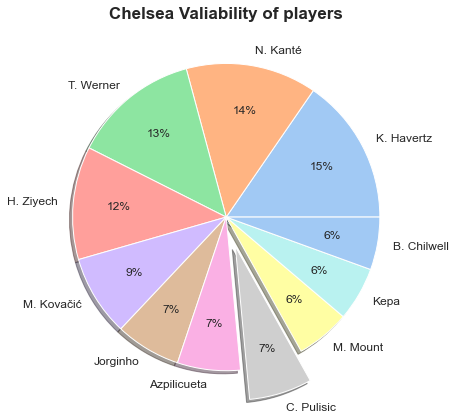

In [26]:


#we will make a pierchart with Matplotlib's plt.pie(). we will consider the following
# autopct - to round the numbers
# explode - to highlight a specific player
# pctdistance - to adjust the distance of the labels
# shadow=True - to give the chart a solid appearance
colors = sns.color_palette('pastel')
plt.figure(figsize = (7,6),tight_layout=True)
explode_list=[0,0,0,0,0,0,0,0.2,0,0,0]
plt.pie(piechart['value_eur'], labels=piechart['short_name'],autopct = '%.0f%%',explode=explode_list,pctdistance=
        .7, colors=colors,shadow=True)
plt.title('Chelsea Valiability of players', weight ='bold')


In [27]:
# we want to create another piechart
#preprocessing
piechart2 = fifa21[fifa21['nationality']=='United States']
piechart2

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
280,227796,https://sofifa.com/player/227796/christian-pul...,C. Pulisic,Christian Pulisic,21,1998-09-18,177,69,United States,Chelsea,...,64+3,57+3,57+3,57+3,64+3,60+3,49+3,49+3,49+3,60+3
1184,232999,https://sofifa.com/player/232999/tyler-adams/2...,T. Adams,Tyler Adams,21,1999-02-14,175,72,United States,RB Leipzig,...,72+2,75+2,75+2,75+2,72+2,73+2,73+2,73+2,73+2,73+2
1225,234777,https://sofifa.com/player/234777/zack-steffen/...,Z. Steffen,Zack Steffen,25,1995-04-02,191,86,United States,Manchester City,...,30+2,35+2,35+2,35+2,30+2,29+2,28+2,28+2,28+2,29+2
1268,204082,https://sofifa.com/player/204082/john-brooks/2...,J. Brooks,John Brooks,27,1993-01-28,193,78,United States,VfL Wolfsburg,...,67+2,73+2,73+2,73+2,67+2,70+2,76+2,76+2,76+2,70+2
1331,212722,https://sofifa.com/player/212722/deandre-yedli...,D. Yedlin,DeAndre Yedlin,26,1993-07-09,172,75,United States,Newcastle United,...,74+2,69+2,69+2,69+2,74+2,74+2,70+2,70+2,70+2,74+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18657,258743,https://sofifa.com/player/258743/aidan-liu/210002,A. Liu,Aidan Liu,20,2000-07-01,193,80,United States,Vejle Boldklub,...,44+2,43+2,43+2,43+2,44+2,47+2,51+2,51+2,51+2,47+2
18679,242206,https://sofifa.com/player/242206/jeff-caldwell...,J. Caldwell,Jefferson Caldwell,24,1996-02-20,190,85,United States,New England Revolution,...,17+2,20+2,20+2,20+2,17+2,18+2,20+2,20+2,20+2,18+2
18692,247874,https://sofifa.com/player/247874/griffin-yow/2...,G. Yow,Griffin McDorman Yow,17,2002-09-25,170,61,United States,DC United,...,37+2,33+2,33+2,33+2,37+2,34+2,27+2,27+2,27+2,34+2
18744,254154,https://sofifa.com/player/254154/casey-walls/2...,C. Walls,Casey Walls,17,2003-01-10,188,78,United States,San Jose Earthquakes,...,45+2,47+2,47+2,47+2,45+2,46+2,50+2,50+2,50+2,46+2


piechart2 = piechart2[:10].sort_values('value_eur')[['short_name','value_eur']]
piechart2

Text(0.5, 1.0, 'United States Valiability of players')

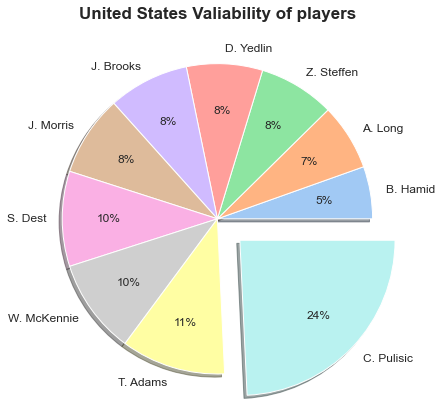

In [30]:
colors = sns.color_palette('pastel')
plt.figure(figsize = (7,6),tight_layout=True)
explode_list=[0,0,0,0,0,0,0,0,0,0.2]
plt.pie(piechart2['value_eur'], labels=piechart2['short_name'],autopct = '%.0f%%',explode=explode_list,pctdistance=
        .7, colors=colors,shadow=True)
plt.title('United States Valiability of players', weight ='bold')

# Line Plot